Standardizing Data

1

In [356]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y=True)
samples = np.array(samples).T

centered_samples = np.add(samples.T, -1 * np.mean(samples, axis=1))

2

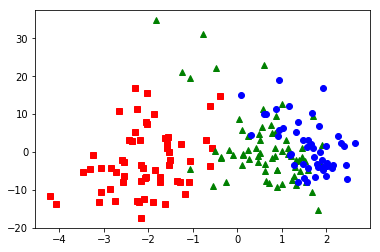

In [357]:
C = np.cov(centered_samples.T)

values, vectors = np.linalg.eig(C)

U = np.append(np.array([vectors[0]]).T, np.array([vectors[1]]).T, axis=1)

pca_data = np.matmul(U.T, centered_samples.T)

red = np.array([[],[]])
green = np.array([[],[]])
blue = np.array([[],[]])
for i, label in enumerate(labels):
    if label == 0:
        red = np.append(red, np.array([pca_data[:,i]]).T, axis=1)
    if label == 1:
        green = np.append(green, np.array([pca_data[:,i]]).T, axis=1)
    if label == 2:
        blue = np.append(blue, np.array([pca_data[:,i]]).T, axis=1)
                
plt.plot(red[0], red[1], 'rs')
plt.plot(green[0], green[1], 'g^')
plt.plot(blue[0], blue[1], 'bo')
plt.show()

3

In [358]:
centered_normalized_samples = np.divide(centered_samples, np.std(centered_samples, axis=0))

4

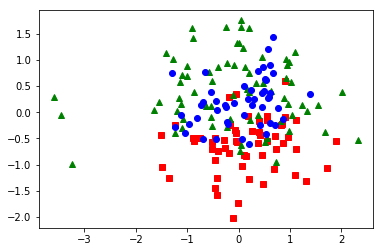

In [359]:
norm_C = np.cov(centered_normalized_samples.T)

norm_values, norm_vectors = np.linalg.eig(norm_C)

norm_U = np.append(np.array([norm_vectors[0]]).T, np.array([norm_vectors[1]]).T, axis=1)

norm_pca_data = np.matmul(norm_U.T, centered_normalized_samples.T)

norm_red = np.array([[],[]])
norm_green = np.array([[],[]])
norm_blue = np.array([[],[]])
for i, label in enumerate(labels):
    if label == 0:
        norm_red = np.append(norm_red, np.array([norm_pca_data[:,i]]).T, axis=1)
    if label == 1:
        norm_green = np.append(norm_green, np.array([norm_pca_data[:,i]]).T, axis=1)
    if label == 2:
        norm_blue = np.append(norm_blue, np.array([norm_pca_data[:,i]]).T, axis=1)

plt.plot(norm_red[0], norm_red[1], 'rs')
plt.plot(norm_green[0], norm_green[1], 'g^')
plt.plot(norm_blue[0], norm_blue[1], 'bo')
plt.show()

5.
Looking at the graphs above, the data set that was only mean centered would lead to better classification performance since there is less overlap between the different labeled data points.

Naive Bayes Classification

1

In [360]:
class naiveBayeGaussians:
    
    def __init__(self):
        self.classVars = np.array([[],[],[],[]])
        
    def fit(self, X, Y):
        # Segment data by class
        red = np.array([[],[]])
        green = np.array([[],[]])
        blue = np.array([[],[]])
        for i, label in enumerate(Y):
            if label == 0:
                red = np.append(red, np.array([X[:,i]]).T, axis=1)
            if label == 1:
                green = np.append(green, np.array([X[:,i]]).T, axis=1)
            if label == 2:
                blue = np.append(blue, np.array([X[:,i]]).T, axis=1)
                
        # Compute Vars for each class
        
        classes = [red, green, blue]
        for cls in classes:
            # Feature 1
            m1 = np.mean(cls[0])
            v1 = np.var(cls[0])
            # Feature 2
            m2 = np.mean(cls[1])
            v2 = np.var(cls[1])
            self.classVars = np.append(self.classVars, np.array([[m1], [v1], [m2], [v2]]), axis=1)
            
    def predict(self, X):
        output = np.array([])
        # Loop through all data
        for x in X.T:
            # Probablility of each class
            probs = np.array([])
            # Loop through all vars for each class
            for var in self.classVars.T:
                prob1 = self.__normDist(var[0], var[1], x[0])
                prob2 = self.__normDist(var[2], var[3], x[1])
                probs = np.append(probs, prob1 * prob2)
                                         
            # Return class with highest probability
            #print(probs)
            output = np.append(output, np.argmax(probs))
        return output
            
    def printClassVars(self):
        print("Class 0 | Feature 0 - Mean: ", self.classVars.T[0][0], "\tVar: ", self.classVars.T[0][1])
        print("Class 0 | Feature 1 - Mean: ", self.classVars.T[0][2], "\tVar: ", self.classVars.T[0][3])
        print("Class 1 | Feature 0 - Mean: ", self.classVars.T[1][0], "\tVar: ", self.classVars.T[1][1])
        print("Class 1 | Feature 1 - Mean: ", self.classVars.T[1][2], "\tVar: ", self.classVars.T[1][3])
        print("Class 2 | Feature 0 - Mean: ", self.classVars.T[2][0], "\tVar: ", self.classVars.T[2][1])
        print("Class 2 | Feature 1 - Mean: ", self.classVars.T[2][2], "\tVar: ", self.classVars.T[2][3])


        
    def __normDist(self, u, v, x):
        return math.exp(-(math.pow(x-u,2)/(2*v)))/(math.sqrt(2*math.pi*v))

2

In [361]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)


print("--My Bayes on centered data--")
myAccCentered = np.array([])

for train_index, test_index in kf.split(pca_data.T):
    myBayes = naiveBayeGaussians()

    #print("TRAIN:", train_index, "\nTEST:", test_index)
    X_train, X_test = pca_data.T[train_index].T, pca_data.T[test_index].T
    y_train, y_test = labels[train_index], labels[test_index]
    
    myBayes.fit(X_train, y_train)
    predictions =  myBayes.predict(X_test)
    print("Prediction: \t",predictions)
    print("Label: \t\t", y_test)
    
    match = 0
    for x in range(0, len(y_test)):
        if predictions[x] == y_test[x]:
            match += 1
    accuracy = match/len(y_test)
    myAccCentered = np.append(myAccCentered, accuracy)

    print("Accuracy: ", accuracy)

print("Average Accuracy: ", np.mean(myAccCentered))
print()

    
print("--My Bayes on standardized data--")
myAccStand = np.array([])

for train_index, test_index in kf.split(norm_pca_data.T):
    myBayes = naiveBayeGaussians()

    #print("TRAIN:", train_index, "\nTEST:", test_index)
    X_train, X_test = norm_pca_data.T[train_index].T, norm_pca_data.T[test_index].T
    y_train, y_test = labels[train_index], labels[test_index]
    
    myBayes.fit(X_train, y_train)
    predictions =  myBayes.predict(X_test)
    print("Prediction: \t",predictions)
    print("Label: \t\t", y_test)
    
    match = 0
    for x in range(0, len(y_test)):
        if predictions[x] == y_test[x]:
            match += 1
    accuracy = match/len(y_test)
    myAccStand = np.append(myAccStand, accuracy)

    print("Accuracy: ", accuracy)
    
print("Average Accuracy: ", np.mean(myAccStand))
print()

    
print("--sklearns naive Bayes on standardized data--")
skNBAcc = np.array([])

skNB = GaussianNB()

for train_index, test_index in kf.split(norm_pca_data.T):
    
    #print("TRAIN:", train_index, "\nTEST:", test_index)
    X_train, X_test = norm_pca_data.T[train_index], norm_pca_data.T[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    skNB.fit(X_train, y_train)
    predictions = skNB.predict(X_test)
    print("Prediction: \t", predictions)
    print("Label: \t\t", y_test)
    
    match = 0
    for x in range(0, len(y_test)):
        if predictions[x] == y_test[x]:
            match += 1
    accuracy = match/len(y_test)
    skNBAcc = np.append(skNBAcc, accuracy)

    print("Accuracy: ", accuracy)
     
print("Average Accuracy: ", np.mean(skNBAcc))
print()

    
    

--My Bayes on centered data--
Prediction: 	 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 		 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.8888888888888888
Prediction: 	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 2.]
Label: 		 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy:  0.9444444444444444
Prediction: 	 [2. 1. 1. 1. 1. 1. 0. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 2. 1. 2. 1. 2.]
Label: 		 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy:  0.5555555555555556
Prediction: 	 [2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Label: 		 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy:  0.6571428571428571
Prediction: 	 [2. 1

3

In [362]:
print("Case 1:")
print("Mean: ", np.mean(myAccCentered), "\tVar: ", np.var(myAccCentered))
print("Case 2:")
print("Mean: ", np.mean(myAccStand), "\tVar: ", np.var(myAccStand))
print("Case 3:")
print("Mean: ", np.mean(skNBAcc), "\tVar: ", np.var(skNBAcc))

Case 1:
Mean:  0.7634920634920634 	Var:  0.02061577223481985
Case 2:
Mean:  0.5563492063492063 	Var:  0.014161249685059208
Case 3:
Mean:  0.4314285714285715 	Var:  0.06165648778029731


The mean of case one is the highest since the three classes are the best seperated when the data is only centered. Class two and three have much lower means since the data is overlapping much more when it is standardized, which makes predicting the data much harder.

The variance of case 2 is the smallest because it would consistently guess the data with the same accuracy between different partitions. Case 1 had a higher variance since it was much better at guessing some partitions better than others, for example it was very good at guessing class 1 data points compared to the other classes. Case 3 had the worse variance because it was not able to predict class 2 very well at all, and ende
